<h3>1-2</h3>


In [181]:
import torch
from PIL import Image
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

device = "cuda" if torch.cuda.is_available else "cpu"
torch.set_default_device(device)
torch.manual_seed(42)

device

'cuda'

In [182]:
import os

classes = train_directories = os.listdir("./TRAIN/")
discretized_classes = [i for i in range(classes.__len__())]
classes, discretized_classes

X = torch.zeros((8000 + 8000, 3, 128, 128), dtype=torch.uint8)
X_finetune = torch.zeros((1600 + 1600, 3, 128, 128), dtype=torch.uint8)

In [183]:
common_transform = transforms.Compose([transforms.PILToTensor()])
augmented_transform = transforms.Compose(
    [
        transforms.PILToTensor(),
        transforms.RandomAffine(degrees=20, translate=(0.10, 0.10), shear=30),
    ]  # rotation from -20 to 20 , translate %10 along both axes, and rotation along the x-axis
)

# finetune = torch.zeros((1600 + 1600, 3, 128, 128))
some_transformed_random_images_for_showcasing = []

for process in ["TRAIN", "TUNE"]:
    x_iterator = 0
    for directory in classes:
        directory = f"./{process}/{directory}"
        for file in os.listdir(directory):
            image = Image.open(f"{directory}/{file}")
            if process == "TRAIN":
                X[x_iterator] = common_transform(image)
                X[x_iterator + 1] = augmented_transform(image)
            else:
                X_finetune[x_iterator] = common_transform(image)
                X_finetune[x_iterator + 1] = augmented_transform(image)
            x_iterator += 2

In [184]:
from sklearn.model_selection import train_test_split

y = torch.zeros(16000, dtype=torch.uint8)
y_finetune = torch.zeros(16000, dtype=torch.uint8)

for i in range(classes.__len__()):
    y[i * 2000 : i * 2000 + 2000] = i
    y_finetune[i * 400 : i * 400 + 400] = i
X_train, X_test, y_train, y_test = train_test_split(X, y)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([12000, 3, 128, 128]),
 torch.Size([4000, 3, 128, 128]),
 torch.Size([12000]),
 torch.Size([4000]))

<h2>Show casing Augmented data</h2>
only one augmented image is produced for each of the images


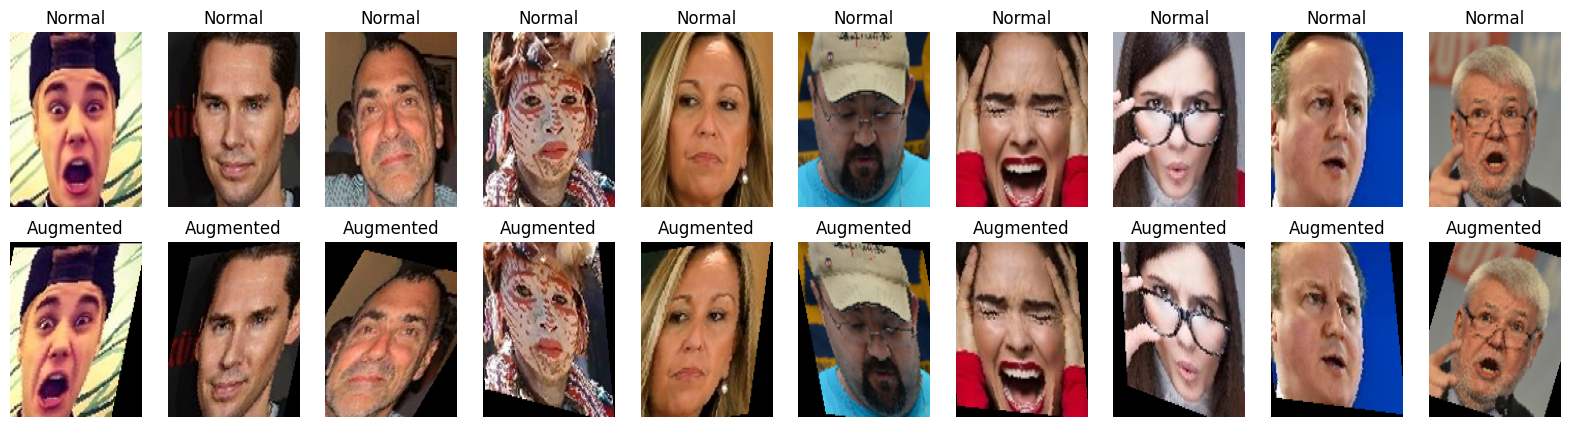

In [186]:
row = 2
col = 10
_, ax = plt.subplots(2, 10, figsize=(20, 5))

for i in range(0, col):
    image_index = torch.randint(low=0, high=X.__len__(), size=(1,), dtype=int).item()
    if image_index % 2 != 0:
        image_index -= 1

    ax[0][i].imshow(X[image_index].cpu().permute(1, 2, 0), aspect="auto")
    ax[0][i].axis("off")
    ax[0][i].set_title("Normal")

    ax[1][i].imshow(X[image_index + 1].cpu().permute(1, 2, 0), aspect="auto")
    ax[1][i].axis("off")
    ax[1][i].set_title("Augmented")
plt.show()